In [1]:
# Import necessory libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset

dt = pd.read_csv('ai_dev_productivity.csv')
dt.head(5)

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
dt.describe()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,5.015600,463.192000,2.976000,6.975800,4.60800,0.858000,1.510920,4.498200,0.606000
std,1.947253,142.334991,1.678409,1.455965,2.70499,1.102846,1.085557,1.868861,0.489124
min,0.000000,6.000000,0.000000,3.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,3.600000,369.500000,2.000000,6.100000,3.00000,0.000000,0.697500,3.175000,0.000000
50%,5.030000,500.500000,3.000000,6.950000,5.00000,0.000000,1.260000,4.400000,1.000000
75%,6.275000,600.000000,4.000000,7.900000,6.00000,2.000000,2.070000,5.800000,1.000000
max,12.000000,600.000000,8.000000,10.000000,13.00000,5.000000,6.360000,10.000000,1.000000


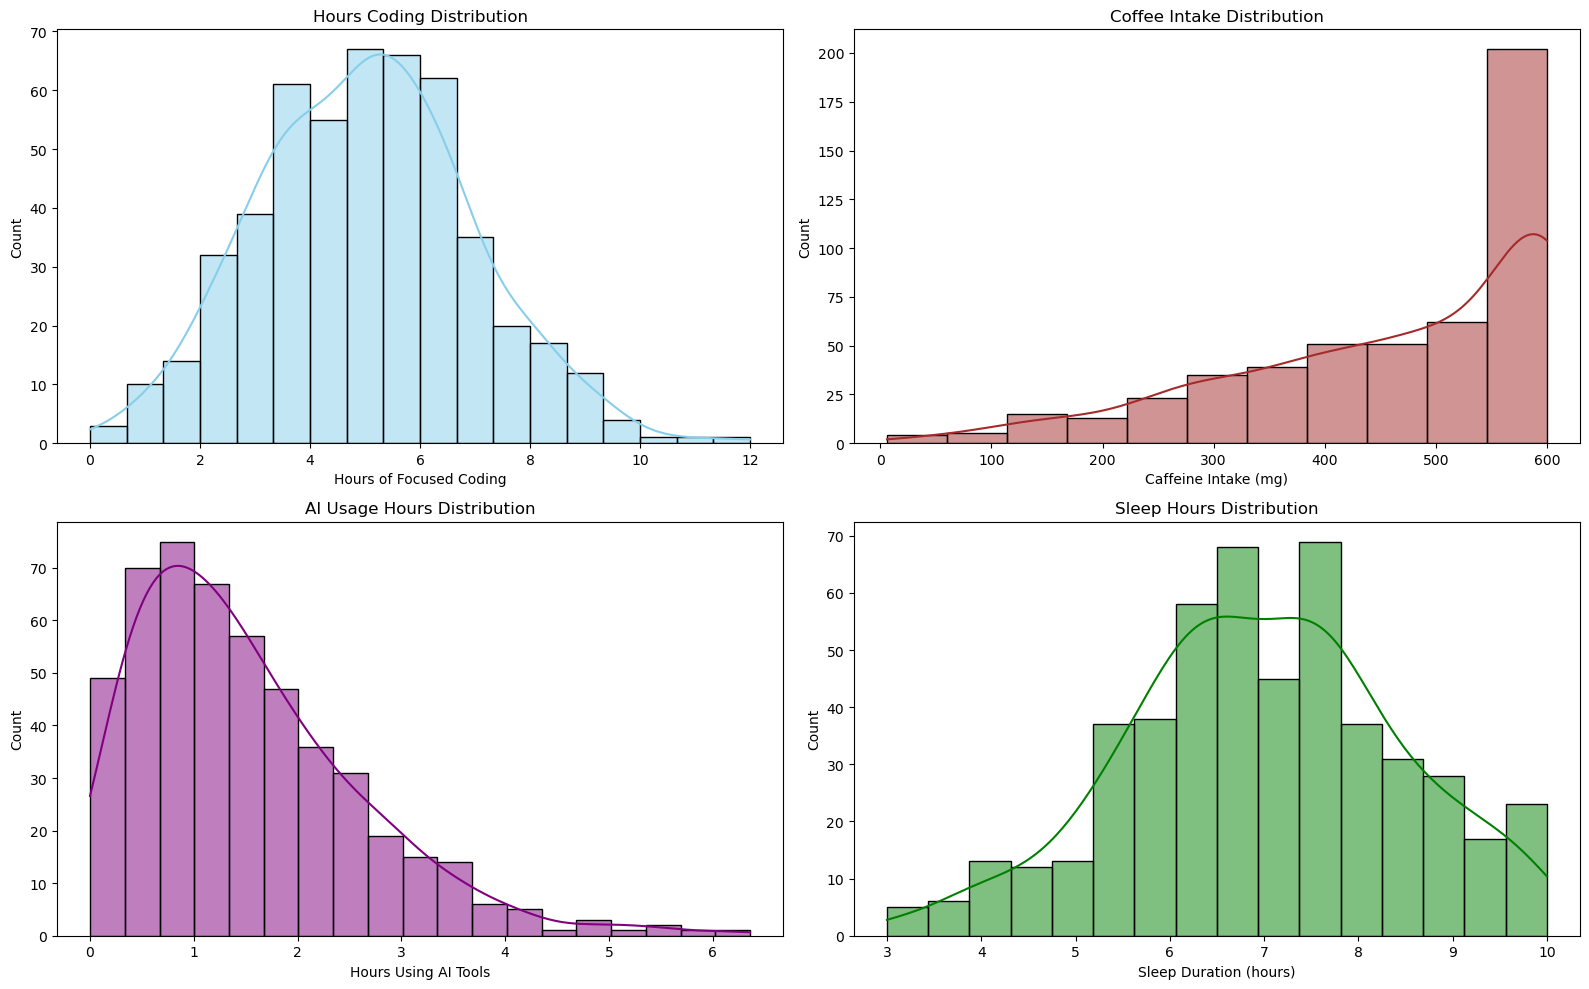

In [5]:
# Histogram of several columns

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# hours_coding
sns.histplot(dt['hours_coding'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Hours Coding Distribution')
axes[0, 0].set_xlabel('Hours of Focused Coding')

# coffee_intake_mg
sns.histplot(dt['coffee_intake_mg'], kde=True, ax=axes[0, 1], color='brown')
axes[0, 1].set_title('Coffee Intake Distribution')
axes[0, 1].set_xlabel('Caffeine Intake (mg)')

# ai_usage_hours
sns.histplot(dt['ai_usage_hours'], kde=True, ax=axes[1, 0], color='purple')
axes[1, 0].set_title('AI Usage Hours Distribution')
axes[1, 0].set_xlabel('Hours Using AI Tools')

# sleep_hours
sns.histplot(dt['sleep_hours'], kde=True, ax=axes[1, 1], color='green')
axes[1, 1].set_title('Sleep Hours Distribution')
axes[1, 1].set_xlabel('Sleep Duration (hours)')

plt.tight_layout()
plt.show()


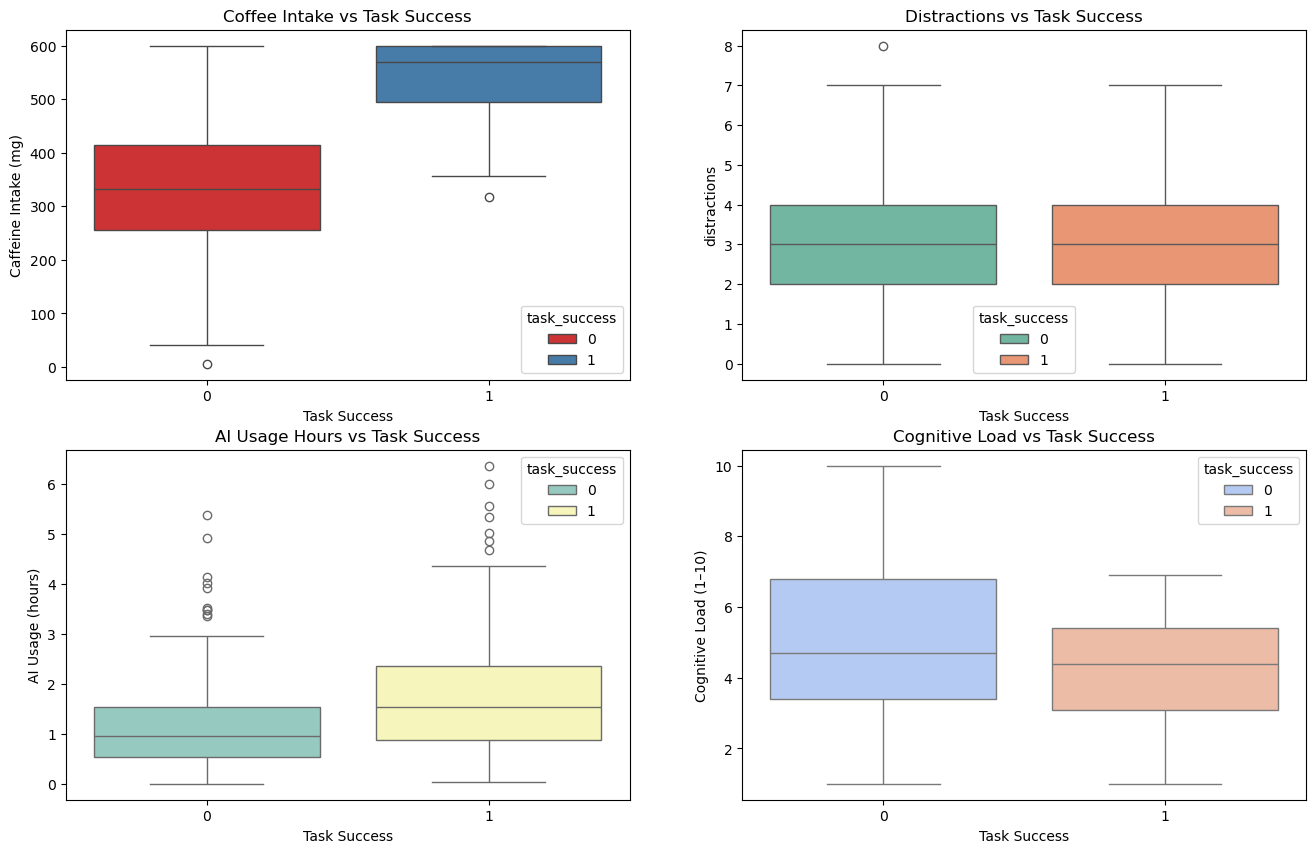

In [6]:
# getting various about several columns with Task_success column
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

#coffee_intake_mg vs task_success
sns.boxplot(x='task_success', y='coffee_intake_mg',hue='task_success', data=dt, ax=axes[0, 0],palette='Set1')
axes[0, 0].set_title('Coffee Intake vs Task Success')
axes[0, 0].set_xlabel('Task Success')
axes[0, 0].set_ylabel('Caffeine Intake (mg)')

#distractions vs task_success
sns.boxplot(x='task_success',y='distractions',hue='task_success',data=dt,ax=axes[0,1],palette='Set2')
axes[0,1].set_title('Distractions vs Task Success')
axes[0,1].set_xlabel('Task Success')
axes[0,1].set_label('Distrations')

# AI_usage_hours vs task_success
sns.boxplot(x='task_success', y='ai_usage_hours',hue='task_success', data=dt, ax=axes[1, 0], palette='Set3')
axes[1, 0].set_title('AI Usage Hours vs Task Success')
axes[1, 0].set_xlabel('Task Success')
axes[1, 0].set_ylabel('AI Usage (hours)')

# cognitive_load vs task_success
sns.boxplot(x='task_success', y='cognitive_load',hue='task_success', data=dt, ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('Cognitive Load vs Task Success')
axes[1, 1].set_xlabel('Task Success')
axes[1, 1].set_ylabel('Cognitive Load (1–10)')

plt.show()

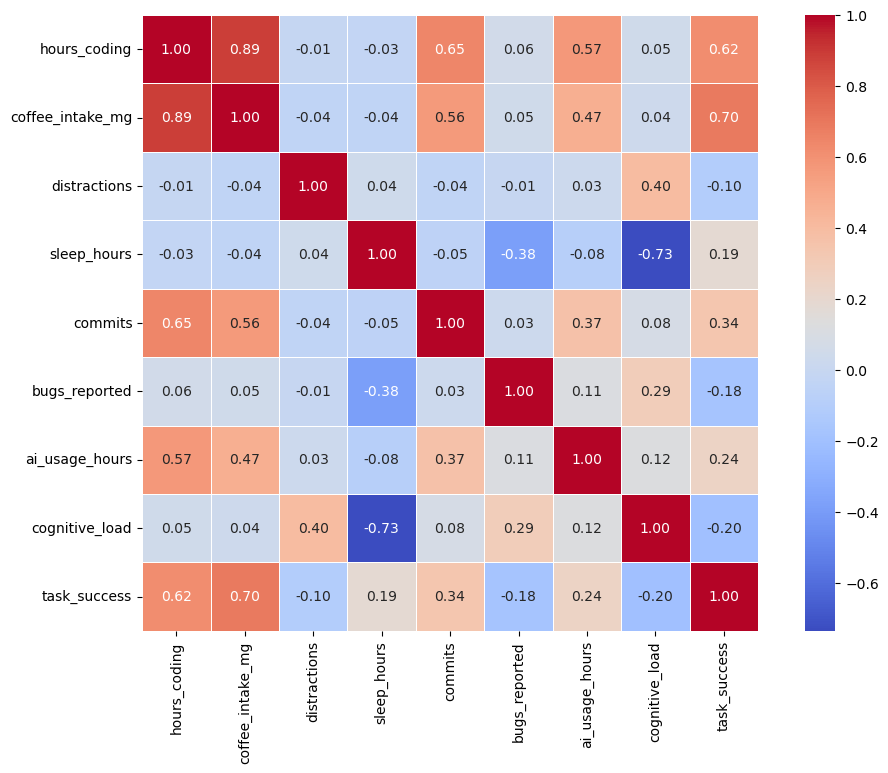

In [7]:
# Shows co-relation between all numaric variable 
plt.figure(figsize=(12,8))
corri = dt.corr(numeric_only=True)

sns.heatmap(corri,annot=True,fmt=".2f", cmap='coolwarm',linewidths=0.5, square=True)
plt.show()

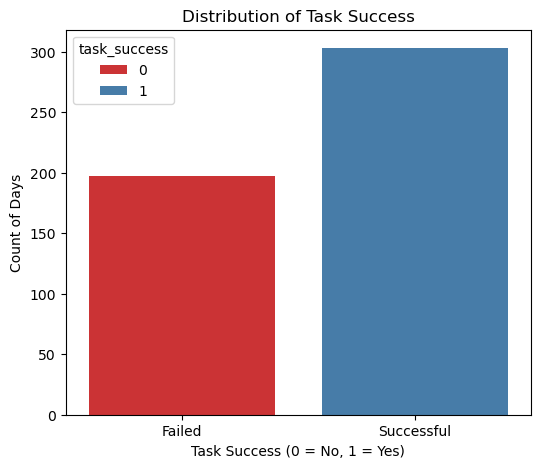

In [8]:
plt.figure(figsize=(6, 5))
sns.countplot(x='task_success',hue='task_success', data=dt, palette='Set1')
plt.title('Distribution of Task Success')
plt.xlabel('Task Success (0 = No, 1 = Yes)')
plt.ylabel('Count of Days')
plt.xticks([0, 1], ['Failed', 'Successful'])
plt.show()

Training Model

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Features and Target
X = dt.drop("task_success", axis=1)
y = dt["task_success"]

#Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add KMeans cluster labels as a new feature
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
X["cluster"] = cluster_labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Using Logestic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [12]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80        34
           1       0.91      0.88      0.89        66

    accuracy                           0.86       100
   macro avg       0.84      0.85      0.85       100
weighted avg       0.86      0.86      0.86       100

Confusion Matrix:
 [[28  6]
 [ 8 58]]


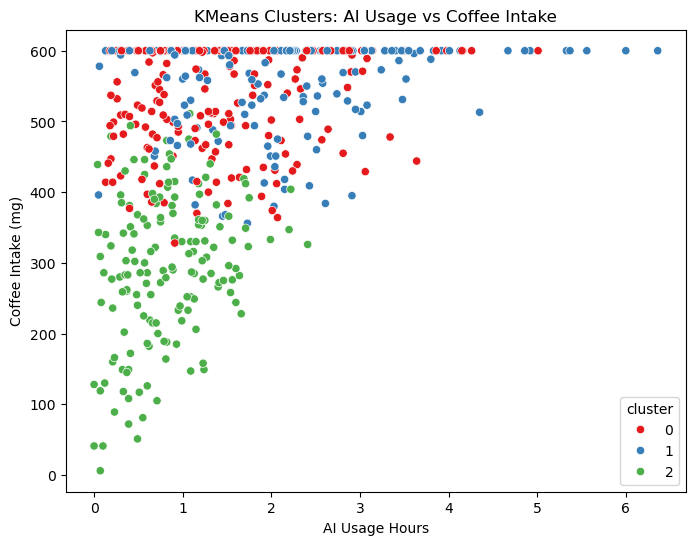

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X["ai_usage_hours"], y=X["coffee_intake_mg"], hue=X["cluster"], palette="Set1")
plt.title("KMeans Clusters: AI Usage vs Coffee Intake")
plt.xlabel("AI Usage Hours")
plt.ylabel("Coffee Intake (mg)")
plt.show()